**Analysis of Youth Detentions and Charges in Canada and demonstration of Jupyter Notebooks**

# Introduction

This is an analysis of datasets provided by the Government of Canada through Statistics Canada and the Government of Canada Open Data Portal. There is no identifying information being used, and all data in this analysis is openly available for anyone to view and use. 
    
This is also a demonstration of using the Python programming language to process data and create visualizations. Jupyter notebook reports will be used to do this. Each step of the process will be explained.
    
There are three goals for this project.

    a) - Find insights relating to charges and detentions laid on youth in Manitoba
    b) - Create visuals to illustrate those insights
    c) - Create files of new datasets that anyone can explore in programs like Excel or Google Sheets

## Personal Note:

My purpose for creating this project is to demonstrate the use of Data Analytics in youthwork. I want to use my 17 years of hands on experience working with youth in Manitoba, to assist domain experts (Psychologists, Sociologists, Accountants, and Program Managers) organize data, identify trends relevant to their interests and create visuals to illustrate those trends. Humans are visual creatures, and we internalize information much better through a graphic than a spreadsheet.

    -Jeremy Klassen

# Boilerplate Python code

In [1]:
# Required Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# setting a variable to the current working directory.

pwd = os.getcwd()

%matplotlib inline

## Reading the data files from government websites into Python.

In [2]:
YD = pd.read_csv('Youth_Detentions.csv')

In [3]:
pop = pd.read_csv('population.csv')

Note: The file below is almost 2 Gb of text (too large for excel to even import). It will take a while to load, so please wait for the '*' change to a number when this code is being run before continuing on.

In [4]:
data = pd.read_csv('CourtCases/CourtCases.csv', low_memory = False)

# Data Cleaning

## Removing unneeded columns

### Youth Detentions 

#### *before* ####

In [5]:
YD.head()

,REF_DATE,GEO,DGUID,Admissions and releases,Correctional services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Total correctional services,Number,223,units,0,v32445599,1.1.1,70542.0,NaN,NaN,NaN,0
1,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Pre-trial detention,Number,223,units,0,v32445600,1.1.2,16010.0,NaN,NaN,NaN,0
2,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Provincial director remand,Number,223,units,0,v32445601,1.1.3,NaN,..,NaN,NaN,0
3,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Secure custody,Number,223,units,0,v32445602,1.1.4,8019.0,NaN,NaN,NaN,0
4,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Custody and supervision (secure),Number,223,units,0,v32445603,1.1.5,NaN,..,NaN,t,0


In [6]:
YD = YD.drop('UOM', axis = 1)
YD = YD.drop('DGUID', axis = 1)
YD = YD.drop('COORDINATE', axis = 1)
YD = YD.drop(['UOM_ID', 'SCALAR_FACTOR', 'VECTOR', 'TERMINATED', 'SYMBOL', 'STATUS', 'DECIMALS'], axis = 1)
YD = YD.drop('SCALAR_ID', axis = 1)

#### *columns after cleaning* ####

In [7]:
YD.head()

,REF_DATE,GEO,Admissions and releases,Correctional services,VALUE
0,1997/1998,Provinces and territories,Youth admissions,Total correctional services,70542.0
1,1997/1998,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
2,1997/1998,Provinces and territories,Youth admissions,Provincial director remand,NaN
3,1997/1998,Provinces and territories,Youth admissions,Secure custody,8019.0
4,1997/1998,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN


### Population

dropping Symbol columns

#### *before* ####

In [8]:
pop.head()

,Geography,Q1 1997,Symbol,Q2 1997,Symbol.1,Q3 1997,Symbol.2,Q4 1997,Symbol.3,Q1 1998,...,Q2 2021,Symbol.97,Q3 2021,Symbol.98,Q4 2021,Symbol.99,Q1 2022,Symbol.100,Q2 2022,Symbol.101
0,Canada,"29,751,536",NaN,"29,818,012",NaN,"29,905,948",NaN,"29,994,790",NaN,"30,028,506",...,"38,153,211",NaN,"38,246,108",NaN,"38,436,447",NaN,"38,526,760",NaN,"38,654,738",NaN
1,Newfoundland and Labrador,"555,432",NaN,"553,115",NaN,"550,911",NaN,"547,639",NaN,"545,769",...,"519,693",NaN,"520,553",NaN,"521,758",NaN,"522,453",NaN,"522,875",NaN
2,Prince Edward Island,"135,935",NaN,"135,931",NaN,"136,095",NaN,"136,165",NaN,"135,938",...,"162,596",NaN,"164,318",NaN,"165,936",NaN,"166,331",NaN,"167,680",NaN
3,Nova Scotia,"932,349",NaN,"931,832",NaN,"932,402",NaN,"932,735",NaN,"932,549",...,"985,776",NaN,"992,055",NaN,"998,832",NaN,"1,002,586",NaN,"1,007,049",NaN
4,New Brunswick,"752,334",NaN,"752,447",NaN,"752,511",NaN,"752,248",NaN,"751,969",...,"785,819",NaN,"789,225",NaN,"794,300",NaN,"797,102",NaN,"800,243",NaN


In [9]:
# Remove all 'symbol' columns

pop = pop.drop('Symbol', axis = 1)
count = 1
for i in pop:
    if count == 102:
        break
    pop = pop.drop('Symbol.' + str(count), axis = 1)
    count += 1

#### *after* ####

In [10]:
pop.head()

,Geography,Q1 1997,Q2 1997,Q3 1997,Q4 1997,Q1 1998,Q2 1998,Q3 1998,Q4 1998,Q1 1999,...,Q1 2020,Q2 2020,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022
0,Canada,"29,751,536","29,818,012","29,905,948","29,994,790","30,028,506","30,080,180","30,155,173","30,231,639","30,260,117",...,"37,908,599","38,000,056","38,037,204","38,033,014","38,068,872","38,153,211","38,246,108","38,436,447","38,526,760","38,654,738"
1,Newfoundland and Labrador,"555,432","553,115","550,911","547,639","545,769","542,479","539,843","537,908","536,515",...,"523,287","522,465","521,364","520,194","519,664","519,693","520,553","521,758","522,453","522,875"
2,Prince Edward Island,"135,935","135,931","136,095","136,165","135,938","135,635","135,804","135,908","135,994",...,"159,387","160,417","161,329","161,402","161,514","162,596","164,318","165,936","166,331","167,680"
3,Nova Scotia,"932,349","931,832","932,402","932,735","932,549","932,033","931,836","932,740","932,145",...,"977,519","979,175","981,889","981,552","982,012","985,776","992,055","998,832","1,002,586","1,007,049"
4,New Brunswick,"752,334","752,447","752,511","752,248","751,969","751,080","750,530","750,708","750,127",...,"780,707","782,199","783,204","783,257","784,156","785,819","789,225","794,300","797,102","800,243"


**This data set has extra null value rows on the bottom that need to be removed.**

#### *before* ####

In [11]:
pop.tail()

,Geography,Q1 1997,Q2 1997,Q3 1997,Q4 1997,Q1 1998,Q2 1998,Q3 1998,Q4 1998,Q1 1999,...,Q1 2020,Q2 2020,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,How to cite: Statistics Canada. Table 17-10-00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### *after* ####

In [12]:
pop = pop.dropna()
pop.tail()

,Geography,Q1 1997,Q2 1997,Q3 1997,Q4 1997,Q1 1998,Q2 1998,Q3 1998,Q4 1998,Q1 1999,...,Q1 2020,Q2 2020,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022
9,Alberta,"2,799,561","2,813,157","2,829,848","2,847,526","2,859,305","2,876,753","2,899,066","2,915,781","2,926,079",...,"4,401,180","4,415,700","4,420,029","4,424,557","4,431,454","4,438,772","4,442,879","4,464,170","4,480,486","4,500,917"
10,British Columbia,"3,914,490","3,931,056","3,948,583","3,964,677","3,972,821","3,977,912","3,983,113","3,990,451","3,995,643",...,"5,137,137","5,150,616","5,158,728","5,156,587","5,163,919","5,185,990","5,214,805","5,249,635","5,264,485","5,286,528"
11,Yukon,"31,633","31,659","31,797","31,556","31,510","31,320","31,149","30,877","30,748",...,"41,700","42,017","42,174","42,300","42,344","42,586","42,986","43,095","42,982","43,249"
12,Northwest Territories 5,"41,528","41,668","41,625","41,411","41,222","40,968","40,802","40,635","40,635",...,"45,269","45,363","45,372","45,265","45,323","45,629","45,504","45,515","45,640","45,607"
13,Nunavut 5,"25,736","25,839","25,884","25,994","26,082","26,183","26,373","26,449","26,575",...,"38,721","38,836","39,155","39,109","39,255","39,336","39,403","39,589","39,710","40,103"


Only one population value per year is needed. The other 3 quarterly values therefore will be dropped. The 'Q2' value left in each column header will also be removed.

In [13]:
# isolate Q2 populations

count = 1997
for i in pop:
    pop = pop.drop('Q1 ' + str(count), axis = 1)
    if count == 2022:
        break
    pop = pop.drop('Q3 ' + str(count), axis = 1)
    pop = pop.drop('Q4 ' + str(count), axis = 1)
    count += 1

In [14]:
# Drop 'Q2' from head and make years an int

count = 1997
for i in pop:
    pop.rename(columns={'Q2 ' + str(count): count}, inplace=True)
    if count == 2022:
        break
    count += 1

#### *result* ####

In [15]:
pop.head()

,Geography,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,"29,818,012","30,080,180","30,314,696","30,594,030","30,910,996","31,253,382","31,550,768","31,846,669","32,141,943",...,"34,958,216","35,323,533","35,611,271","35,970,303","36,398,013","36,898,431","37,422,946","38,000,056","38,153,211","38,654,738"
1,Newfoundland and Labrador,"553,115","542,479","534,498","529,574","523,235","520,228","518,813","517,940","515,358",...,"527,313","527,498","528,063","529,063","528,544","526,395","524,131","522,465","519,693","522,875"
2,Prince Edward Island,"135,931","135,635","136,025","136,289","136,499","136,892","137,120","137,629","137,788",...,"143,948","143,984","144,259","145,784","148,860","152,039","155,916","160,417","162,596","167,680"
3,Nova Scotia,"931,832","932,033","932,116","934,291","932,909","934,177","935,800","938,783","937,991",...,"941,230","938,913","936,271","940,382","947,384","954,618","965,553","979,175","985,776","1,007,049"
4,New Brunswick,"752,447","751,080","750,075","750,543","749,789","748,777","749,265","749,336","748,693",...,"758,132","758,876","758,948","762,289","764,813","768,522","774,035","782,199","785,819","800,243"


### Court Cases

Drop unneeded columns

#### *before*

In [16]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,Number,223,units,0,v60156628,1.1.1.1.1.1,218802.0,NaN,NaN,NaN,0
1,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,Number,223,units,0,v60156629,1.1.1.1.1.2,321.0,NaN,NaN,NaN,0
2,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,Number,223,units,0,v60156630,1.1.1.1.1.3,119838.0,NaN,NaN,NaN,0
3,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,Percentage,242,units,0,v61279858,1.1.1.1.1.4,55.0,NaN,NaN,NaN,0
4,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,Number,223,units,0,v60156631,1.1.1.1.1.5,4307.0,NaN,NaN,NaN,0


In [17]:
data = data.drop('UOM', axis = 1)
data = data.drop('UOM_ID', axis = 1)
data = data.drop('SCALAR_FACTOR', axis = 1)
data = data.drop('SCALAR_ID', axis = 1)
data = data.drop('DECIMALS', axis = 1)
data = data.drop('SYMBOL', axis = 1)
data = data.drop('STATUS', axis = 1)
data = data.drop('TERMINATED', axis = 1)

#### *after*

In [18]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,VECTOR,COORDINATE,VALUE
0,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,v60156628,1.1.1.1.1.1,218802.0
1,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,v60156629,1.1.1.1.1.2,321.0
2,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,v60156630,1.1.1.1.1.3,119838.0
3,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,v61279858,1.1.1.1.1.4,55.0
4,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,v60156631,1.1.1.1.1.5,4307.0


## Date Cleaning

the 'REF_DATE' column in the Court Cases and Youth Detention datasets need to have one year listed instead of two. The data type then needs to be changed from a string to a number in order to make graphs.

### Youth Detention dataset

#### *before*

In [19]:
YD.head()

,REF_DATE,GEO,Admissions and releases,Correctional services,VALUE
0,1997/1998,Provinces and territories,Youth admissions,Total correctional services,70542.0
1,1997/1998,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
2,1997/1998,Provinces and territories,Youth admissions,Provincial director remand,NaN
3,1997/1998,Provinces and territories,Youth admissions,Secure custody,8019.0
4,1997/1998,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN


In [20]:
YD[['REF_DATE', 'Delete']] = YD['REF_DATE'].str.split('/', expand = True)
YD = YD.drop('Delete', axis = 1)
YD['REF_DATE'] = pd.to_numeric(YD['REF_DATE'])

#### *after*

In [21]:
YD.head()

,REF_DATE,GEO,Admissions and releases,Correctional services,VALUE
0,1997,Provinces and territories,Youth admissions,Total correctional services,70542.0
1,1997,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
2,1997,Provinces and territories,Youth admissions,Provincial director remand,NaN
3,1997,Provinces and territories,Youth admissions,Secure custody,8019.0
4,1997,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN


### Court Cases

#### *before*

In [22]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,VECTOR,COORDINATE,VALUE
0,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,v60156628,1.1.1.1.1.1,218802.0
1,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,v60156629,1.1.1.1.1.2,321.0
2,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,v60156630,1.1.1.1.1.3,119838.0
3,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,v61279858,1.1.1.1.1.4,55.0
4,1991/1992,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,v60156631,1.1.1.1.1.5,4307.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9587200 entries, 0 to 9587199
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   REF_DATE          object 
 1   GEO               object 
 2   DGUID             object 
 3   Offences          object 
 4   Age of accused    object 
 5   Sex of accused    object 
 6   Charge and case   object 
 7   Type of decision  object 
 8   VECTOR            object 
 9   COORDINATE        object 
 10  VALUE             float64
dtypes: float64(1), object(10)
memory usage: 804.6+ MB


In [24]:
data[['REF_DATE', 'Delete']] = data['REF_DATE'].str.split('/', expand = True)
data = data.drop('Delete', axis = 1)
data['REF_DATE'] = pd.to_numeric(data['REF_DATE'])

#### *after*

In [25]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,VECTOR,COORDINATE,VALUE
0,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,v60156628,1.1.1.1.1.1,218802.0
1,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,v60156629,1.1.1.1.1.2,321.0
2,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,v60156630,1.1.1.1.1.3,119838.0
3,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,v61279858,1.1.1.1.1.4,55.0
4,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,v60156631,1.1.1.1.1.5,4307.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9587200 entries, 0 to 9587199
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   REF_DATE          int64  
 1   GEO               object 
 2   DGUID             object 
 3   Offences          object 
 4   Age of accused    object 
 5   Sex of accused    object 
 6   Charge and case   object 
 7   Type of decision  object 
 8   VECTOR            object 
 9   COORDINATE        object 
 10  VALUE             float64
dtypes: float64(1), int64(1), object(9)
memory usage: 804.6+ MB


## **Remove spaces from headers**

Headers cannot have spaces in them in order to make use of many functions programs and coding languages. Youth Detentions and Court Cases dataframes need to have ' ' replaced with '_'. Additionally we will replace the 'VALUE' term in Youth Detentions to 'Corrections'.

#### *Before*

In [27]:
YD.head()

,REF_DATE,GEO,Admissions and releases,Correctional services,VALUE
0,1997,Provinces and territories,Youth admissions,Total correctional services,70542.0
1,1997,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
2,1997,Provinces and territories,Youth admissions,Provincial director remand,NaN
3,1997,Provinces and territories,Youth admissions,Secure custody,8019.0
4,1997,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN


In [28]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,VECTOR,COORDINATE,VALUE
0,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,v60156628,1.1.1.1.1.1,218802.0
1,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,v60156629,1.1.1.1.1.2,321.0
2,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,v60156630,1.1.1.1.1.3,119838.0
3,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,v61279858,1.1.1.1.1.4,55.0
4,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,v60156631,1.1.1.1.1.5,4307.0


#### *After*

In [29]:
YD.rename(columns={'Admissions and releases': 'Admissions_and_releases', 'Correctional services': 'Correctional_services', 'VALUE': 'Corrections'}, inplace=True)
YD.head()

,REF_DATE,GEO,Admissions_and_releases,Correctional_services,Corrections
0,1997,Provinces and territories,Youth admissions,Total correctional services,70542.0
1,1997,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
2,1997,Provinces and territories,Youth admissions,Provincial director remand,NaN
3,1997,Provinces and territories,Youth admissions,Secure custody,8019.0
4,1997,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN


In [30]:
data.rename(
    columns = {'Age of accused': 'Age_of_accused', 'Sex of accused' : 'Sex_of_accused', 'Charge and case' : 'Charge_and_case', 'Type of decision': 'Type_of_decision'}, inplace=True
)
data.head()

,REF_DATE,GEO,DGUID,Offences,Age_of_accused,Sex_of_accused,Charge_and_case,Type_of_decision,VECTOR,COORDINATE,VALUE
0,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,v60156628,1.1.1.1.1.1,218802.0
1,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Transferred to adult court,v60156629,1.1.1.1.1.2,321.0
2,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,v60156630,1.1.1.1.1.3,119838.0
3,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,v61279858,1.1.1.1.1.4,55.0
4,1991,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,v60156631,1.1.1.1.1.5,4307.0


## **Drop rows with summaries of other rows in Court Cases and Youth Detentions**

The various offence categories in the Court Cases dataset have been summarized into other rows. These summary rows need to be removed to avoid duplicate data. In addition rows with values of 0 or null will be dropped in order to make graphs cleaner.

### Court Cases

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9587200 entries, 0 to 9587199
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   REF_DATE          int64  
 1   GEO               object 
 2   DGUID             object 
 3   Offences          object 
 4   Age_of_accused    object 
 5   Sex_of_accused    object 
 6   Charge_and_case   object 
 7   Type_of_decision  object 
 8   VECTOR            object 
 9   COORDINATE        object 
 10  VALUE             float64
dtypes: float64(1), int64(1), object(9)
memory usage: 804.6+ MB


In [32]:
data.drop(data.index[data['Type_of_decision'] == 'Total decisions'], inplace = True)
data.drop(data.index[data['Charge_and_case'] == 'Total charges'], inplace = True)
data.drop(data.index[data['Charge_and_case'] == 'Total cases'], inplace = True)
data.drop(data.index[data['Offences'] == 'Total Criminal Code'], inplace = True)
data.drop(data.index[data['Offences'] == 'Criminal Code (without traffic)'], inplace = True)
data.drop(data.index[data['Offences'] == 'Total offences'], inplace = True)
data.drop(data.index[data['VALUE'] == 0.0], inplace = True)
data.drop(data.index[data['Offences'] == 'Crimes against the person'], inplace = True)
data.drop(data.index[data['Offences'] == 'Crimes against property'], inplace = True)
data.drop(data.index[data['Offences'] == 'Administration of justice'], inplace = True)
data.drop(data.index[data['Offences'] == 'Other federal statutes'], inplace = True)
data.drop(data.index[data['Offences'] == 'Youth Criminal Justice Act'], inplace = True)
data.drop(data.index[data['Sex_of_accused'] == 'Total, sex of accused'], inplace = True)
data.drop(data.index[data['Age_of_accused'] == 'Total, age of accused'], inplace = True)
data = data.dropna()
data = data.reset_index()
data = data.drop('index', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343045 entries, 0 to 343044
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   REF_DATE          343045 non-null  int64  
 1   GEO               343045 non-null  object 
 2   DGUID             343045 non-null  object 
 3   Offences          343045 non-null  object 
 4   Age_of_accused    343045 non-null  object 
 5   Sex_of_accused    343045 non-null  object 
 6   Charge_and_case   343045 non-null  object 
 7   Type_of_decision  343045 non-null  object 
 8   VECTOR            343045 non-null  object 
 9   COORDINATE        343045 non-null  object 
 10  VALUE             343045 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 28.8+ MB


### Youth Detentions

In [33]:
YD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 10766 non-null  int64  
 1   GEO                      10766 non-null  object 
 2   Admissions_and_releases  10766 non-null  object 
 3   Correctional_services    10766 non-null  object 
 4   Corrections              5755 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 420.7+ KB


In [34]:
YD.drop(YD.index[YD['Correctional_services'] == 'Total correctional services'], inplace = True)
YD.drop(YD.index[YD['Correctional_services'] == 'Total community sentences'], inplace = True)

YD = YD.reset_index()
YD = YD.drop('index', axis = 1)

YD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 9226 non-null   int64  
 1   GEO                      9226 non-null   object 
 2   Admissions_and_releases  9226 non-null   object 
 3   Correctional_services    9226 non-null   object 
 4   Corrections              4666 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 360.5+ KB


In [35]:
YD.Correctional_services.unique()

array(['Pre-trial detention', 'Provincial director remand',
       'Secure custody', 'Custody and supervision (secure)',
       'Young Offenders Act (YOA) (secure)', 'Open custody',
       'Custody and supervision (open)',
       'Young Offenders Act (YOA) (open)',
       'Community Portion of Custody Supervision',
       'Intensive support and supervision',
       'Deferred custody and supervision', 'Supervised probation',
       'Other community sentences'], dtype=object)

# **Engineering (transforming) data**

## Drop Canada, and low population Provinces and Territories

displaying all 13 provinces and territories on graphs get messy. In addition the numbers of the Maritime provinces and the Territories are so low compared to the other provinces that their data is unreadable. Quebec will also be removed due to the severe lack of data provided by Quebec.

Also Canada population totals are listed in both the court cases and Population datasets currently. Since only the relevant provinces are needed Canada values will be removed.

#### *Population Before*

In [36]:
pop

,Geography,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,"29,818,012","30,080,180","30,314,696","30,594,030","30,910,996","31,253,382","31,550,768","31,846,669","32,141,943",...,"34,958,216","35,323,533","35,611,271","35,970,303","36,398,013","36,898,431","37,422,946","38,000,056","38,153,211","38,654,738"
1,Newfoundland and Labrador,"553,115","542,479","534,498","529,574","523,235","520,228","518,813","517,940","515,358",...,"527,313","527,498","528,063","529,063","528,544","526,395","524,131","522,465","519,693","522,875"
2,Prince Edward Island,"135,931","135,635","136,025","136,289","136,499","136,892","137,120","137,629","137,788",...,"143,948","143,984","144,259","145,784","148,860","152,039","155,916","160,417","162,596","167,680"
3,Nova Scotia,"931,832","932,033","932,116","934,291","932,909","934,177","935,800","938,783","937,991",...,"941,230","938,913","936,271","940,382","947,384","954,618","965,553","979,175","985,776","1,007,049"
4,New Brunswick,"752,447","751,080","750,075","750,543","749,789","748,777","749,265","749,336","748,693",...,"758,132","758,876","758,948","762,289","764,813","768,522","774,035","782,199","785,819","800,243"
5,Quebec,"7,267,820","7,290,497","7,315,053","7,347,179","7,383,844","7,428,016","7,471,775","7,520,262","7,567,307",...,"8,090,916","8,132,425","8,163,063","8,204,085","8,272,894","8,367,551","8,466,531","8,574,270","8,587,179","8,653,184"
6,Ontario,"11,179,959","11,322,038","11,452,857","11,621,255","11,827,345","12,030,408","12,195,501","12,341,656","12,477,967",...,"13,467,829","13,582,747","13,669,860","13,816,545","14,006,386","14,235,643","14,467,552","14,729,324","14,795,883","15,007,816"
7,Manitoba,"1,135,846","1,136,177","1,140,502","1,145,873","1,149,684","1,154,737","1,160,863","1,170,347","1,177,285",...,"1,260,834","1,274,407","1,288,094","1,307,689","1,328,412","1,347,055","1,364,667","1,379,735","1,383,638","1,393,179"
8,Saskatchewan,"1,017,683","1,017,105","1,015,716","1,009,177","1,001,643","997,740","995,748","997,080","994,892",...,"1,094,390","1,109,631","1,118,806","1,131,147","1,146,218","1,158,451","1,169,397","1,179,939","1,180,314","1,186,308"
9,Alberta,"2,813,157","2,876,753","2,937,393","2,988,465","3,041,238","3,108,360","3,169,049","3,223,490","3,296,271",...,"3,946,798","4,054,280","4,128,300","4,181,765","4,227,969","4,281,706","4,344,454","4,415,700","4,438,772","4,500,917"


#### *After*

In [37]:
pop = pop.drop(11, axis = 0)
pop = pop.drop(12, axis = 0)
pop = pop.drop(13, axis = 0)
pop = pop.drop(1, axis = 0)
pop = pop.drop(2, axis = 0)
pop = pop.drop(3, axis = 0)
pop = pop.drop(4, axis = 0)
pop = pop.drop(0, axis = 0)
pop = pop.drop(5, axis = 0)
pop = pop.reset_index()
pop = pop.drop('index', axis = 1)
pop

,Geography,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Ontario,"11,179,959","11,322,038","11,452,857","11,621,255","11,827,345","12,030,408","12,195,501","12,341,656","12,477,967",...,"13,467,829","13,582,747","13,669,860","13,816,545","14,006,386","14,235,643","14,467,552","14,729,324","14,795,883","15,007,816"
1,Manitoba,"1,135,846","1,136,177","1,140,502","1,145,873","1,149,684","1,154,737","1,160,863","1,170,347","1,177,285",...,"1,260,834","1,274,407","1,288,094","1,307,689","1,328,412","1,347,055","1,364,667","1,379,735","1,383,638","1,393,179"
2,Saskatchewan,"1,017,683","1,017,105","1,015,716","1,009,177","1,001,643","997,740","995,748","997,080","994,892",...,"1,094,390","1,109,631","1,118,806","1,131,147","1,146,218","1,158,451","1,169,397","1,179,939","1,180,314","1,186,308"
3,Alberta,"2,813,157","2,876,753","2,937,393","2,988,465","3,041,238","3,108,360","3,169,049","3,223,490","3,296,271",...,"3,946,798","4,054,280","4,128,300","4,181,765","4,227,969","4,281,706","4,344,454","4,415,700","4,438,772","4,500,917"
4,British Columbia,"3,931,056","3,977,912","4,002,433","4,033,319","4,066,132","4,094,236","4,114,925","4,145,951","4,182,963",...,"4,611,648","4,684,490","4,757,759","4,832,155","4,905,210","4,983,183","5,066,120","5,150,616","5,185,990","5,286,528"


#### *Youth Detentions Before*

In [38]:
YD.head()

,REF_DATE,GEO,Admissions_and_releases,Correctional_services,Corrections
0,1997,Provinces and territories,Youth admissions,Pre-trial detention,16010.0
1,1997,Provinces and territories,Youth admissions,Provincial director remand,NaN
2,1997,Provinces and territories,Youth admissions,Secure custody,8019.0
3,1997,Provinces and territories,Youth admissions,Custody and supervision (secure),NaN
4,1997,Provinces and territories,Youth admissions,Young Offenders Act (YOA) (secure),NaN


In [39]:
YD = YD[YD['GEO'] != 'Provinces and territories']
YD = YD[YD['GEO'] != 'Newfoundland and Labrador']
YD = YD[YD['GEO'] != 'Prince Edward Island']
YD = YD[YD['GEO'] != 'Quebec']
YD = YD[YD['GEO'] != 'New Brunswick']
YD = YD[YD['GEO'] != 'Ontario, Ministry of Children and Youth Services (MCYS)']
YD = YD[YD['GEO'] != 'Nova Scotia']
YD = YD[YD['GEO'] != 'Ontario, Ministry of Community Safety and Correctional Services (MCSCS)']
YD = YD[YD['GEO'] != 'Northwest Territories including Nunavut']
YD = YD[YD['GEO'] != 'Northwest Territories']
YD = YD[YD['GEO'] != 'Yukon']
YD = YD[YD['GEO'] != 'Nunavut']

data = data.reset_index()
data = data.drop('index', axis = 1)

#### *after*

In [40]:
YD.GEO.unique()

array(['Ontario', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia'], dtype=object)

In [41]:
YD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 156 to 9171
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 2840 non-null   int64  
 1   GEO                      2840 non-null   object 
 2   Admissions_and_releases  2840 non-null   object 
 3   Correctional_services    2840 non-null   object 
 4   Corrections              1612 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 133.1+ KB


#### *Court Cases before*

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343045 entries, 0 to 343044
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   REF_DATE          343045 non-null  int64  
 1   GEO               343045 non-null  object 
 2   DGUID             343045 non-null  object 
 3   Offences          343045 non-null  object 
 4   Age_of_accused    343045 non-null  object 
 5   Sex_of_accused    343045 non-null  object 
 6   Charge_and_case   343045 non-null  object 
 7   Type_of_decision  343045 non-null  object 
 8   VECTOR            343045 non-null  object 
 9   COORDINATE        343045 non-null  object 
 10  VALUE             343045 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 28.8+ MB


In [43]:
data.drop(data.index[data['GEO'] == 'Canada'], inplace = True)
data = data.reset_index()
data = data.drop('index', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277940 entries, 0 to 277939
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   REF_DATE          277940 non-null  int64  
 1   GEO               277940 non-null  object 
 2   DGUID             277940 non-null  object 
 3   Offences          277940 non-null  object 
 4   Age_of_accused    277940 non-null  object 
 5   Sex_of_accused    277940 non-null  object 
 6   Charge_and_case   277940 non-null  object 
 7   Type_of_decision  277940 non-null  object 
 8   VECTOR            277940 non-null  object 
 9   COORDINATE        277940 non-null  object 
 10  VALUE             277940 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 23.3+ MB


## **Percentage decisions**

Now that the large dataset has been trimmed down a bit, the value for 'Type of decision' is a percentage out of 100. In order to be counted properly compared to other decisions each percentage based value needs to be divided by 100.

#### *before*

In [44]:
data.head()

,REF_DATE,GEO,DGUID,Offences,Age_of_accused,Sex_of_accused,Charge_and_case,Type_of_decision,VECTOR,COORDINATE,VALUE
0,1991,Newfoundland and Labrador,2016A000210,Attempted murder,16 and 17 years,Males,Related charges,Stayed or withdrawn,v60186656,2.6.3.2.5.6,1.0
1,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Guilty,v60187188,2.7.2.2.4.3,1.0
2,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Percentage guilty,v61284951,2.7.2.2.4.4,50.0
3,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Stayed or withdrawn,v60187190,2.7.2.2.4.6,1.0
4,1991,Newfoundland and Labrador,2016A000210,Robbery,16 and 17 years,Males,Multiple-charge cases,Guilty,v60187308,2.7.3.2.4.3,2.0


In [45]:
data.loc[data['Type_of_decision'] == 'Percentage guilty', 'VALUE'] = (data['VALUE'] / 100)
data.head()

,REF_DATE,GEO,DGUID,Offences,Age_of_accused,Sex_of_accused,Charge_and_case,Type_of_decision,VECTOR,COORDINATE,VALUE
0,1991,Newfoundland and Labrador,2016A000210,Attempted murder,16 and 17 years,Males,Related charges,Stayed or withdrawn,v60186656,2.6.3.2.5.6,1.0
1,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Guilty,v60187188,2.7.2.2.4.3,1.0
2,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Percentage guilty,v61284951,2.7.2.2.4.4,0.5
3,1991,Newfoundland and Labrador,2016A000210,Robbery,12 to 15 years,Males,Multiple-charge cases,Stayed or withdrawn,v60187190,2.7.2.2.4.6,1.0
4,1991,Newfoundland and Labrador,2016A000210,Robbery,16 and 17 years,Males,Multiple-charge cases,Guilty,v60187308,2.7.3.2.4.3,2.0


## **Wide to Long data**

The population dataset was given by Stats Canada in a wide format. It needs to be transformed into a new long format dataframe (popYear) in order to be more useful for graphing.

In [46]:
popYear = pd.DataFrame()
popYear['Geography'] = []
popYear['Year'] = []
popYear['Population'] = []

In [47]:
geo = pop['Geography']
tFrame = pop.drop('Geography', axis = 1)
count = 1997
for col in tFrame:
    row = 0
    while row < 5:
        popYear = popYear.append({'Geography' : geo[row], 'Year' : col, 'Population' : tFrame.loc[row][count]}, ignore_index = True)
#        print(geo[row], col, tFrame.loc[row][count])
        row += 1
    count += 1
    if count == 2022:
        break
popYear

,Geography,Year,Population
0,Ontario,1997.0,"11,179,959"
1,Manitoba,1997.0,"1,135,846"
2,Saskatchewan,1997.0,"1,017,683"
3,Alberta,1997.0,"2,813,157"
4,British Columbia,1997.0,"3,931,056"
...,...,...,...
120,Ontario,2021.0,"14,795,883"
121,Manitoba,2021.0,"1,383,638"
122,Saskatchewan,2021.0,"1,180,314"
123,Alberta,2021.0,"4,438,772"


## **Convert 'Population' to a number datatype**

Population is currently a string datatype. In order to be used by graphs, all the commas will need to be removed and then the column can be converted into a number datatype.

#### *Before*

In [48]:
popYear

,Geography,Year,Population
0,Ontario,1997.0,"11,179,959"
1,Manitoba,1997.0,"1,135,846"
2,Saskatchewan,1997.0,"1,017,683"
3,Alberta,1997.0,"2,813,157"
4,British Columbia,1997.0,"3,931,056"
...,...,...,...
120,Ontario,2021.0,"14,795,883"
121,Manitoba,2021.0,"1,383,638"
122,Saskatchewan,2021.0,"1,180,314"
123,Alberta,2021.0,"4,438,772"


#### *After*

In [49]:
popYear = popYear.replace(',','', regex=True)
popYear['Population'] = pd.to_numeric(popYear['Population'])
popYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geography   125 non-null    object 
 1   Year        125 non-null    float64
 2   Population  125 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


# **Creating specialized dataframes for graphs**

## Create a merge population table with PopYear and Youth Detentions

The first table to create (popMerge) is combining the population table with the Youth Detentions table while including only data relevant to the Western-most provinces (see 'Drop low population Provinces and Territories' section for why). Also duplicate columns will be deleted.

In [50]:
popMerge = YD.merge(popYear, left_on = ['REF_DATE', 'GEO'], right_on = ['Year', 'Geography'], how = 'left')
popMerge.head()

,REF_DATE,GEO,Admissions_and_releases,Correctional_services,Corrections,Geography,Year,Population
0,1997,Ontario,Youth admissions,Pre-trial detention,4966.0,Ontario,1997.0,11179959
1,1997,Ontario,Youth admissions,Provincial director remand,NaN,Ontario,1997.0,11179959
2,1997,Ontario,Youth admissions,Secure custody,3738.0,Ontario,1997.0,11179959
3,1997,Ontario,Youth admissions,Custody and supervision (secure),NaN,Ontario,1997.0,11179959
4,1997,Ontario,Youth admissions,Young Offenders Act (YOA) (secure),NaN,Ontario,1997.0,11179959


In [51]:
popMerge = popMerge.dropna()
popMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 1612 non-null   int64  
 1   GEO                      1612 non-null   object 
 2   Admissions_and_releases  1612 non-null   object 
 3   Correctional_services    1612 non-null   object 
 4   Corrections              1612 non-null   float64
 5   Geography                1612 non-null   object 
 6   Year                     1612 non-null   float64
 7   Population               1612 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 113.3+ KB


In [52]:
popMerge = popMerge.drop('GEO', axis = 1)
popMerge = popMerge.drop('Year', axis = 1)
popMerge = popMerge.reset_index()
popMerge = popMerge.drop('index', axis = 1)

### Remove releases

For this table's 'Admissions and releases' column, only admissions is needed, so releases will be removed and the column renamed appropriately.

In [53]:
popMerge = popMerge[popMerge['Admissions_and_releases'] != 'Youth releases']
popMerge = popMerge.reset_index()
popMerge = popMerge.drop('index', axis = 1)
popMerge.rename(columns={'Admissions_and_releases': 'Admissions'}, inplace=True)
popMerge

,REF_DATE,Admissions,Correctional_services,Corrections,Geography,Population
0,1997,Youth admissions,Pre-trial detention,4966.0,Ontario,11179959
1,1997,Youth admissions,Secure custody,3738.0,Ontario,11179959
2,1997,Youth admissions,Open custody,4219.0,Ontario,11179959
3,1997,Youth admissions,Supervised probation,17699.0,Ontario,11179959
4,1997,Youth admissions,Pre-trial detention,1789.0,Manitoba,1135846
...,...,...,...,...,...,...
826,2020,Youth admissions,Community Portion of Custody Supervision,29.0,British Columbia,5150616
827,2020,Youth admissions,Intensive support and supervision,67.0,British Columbia,5150616
828,2020,Youth admissions,Deferred custody and supervision,31.0,British Columbia,5150616
829,2020,Youth admissions,Supervised probation,287.0,British Columbia,5150616


### Calculate Correctional services per 1000 population

The last thing to do for this dataset before creating graphs and exporting for excel use is to calculate how often youth corrections happen relative to population size. Multiplying by 1000 gives numbers closer to the single digits.

In [54]:
popMerge['Youth_corrections_per_1000_population'] = (popMerge['Corrections'] / popMerge['Population']) * 1000
popMerge

,REF_DATE,Admissions,Correctional_services,Corrections,Geography,Population,Youth_corrections_per_1000_population
0,1997,Youth admissions,Pre-trial detention,4966.0,Ontario,11179959,0.444188
1,1997,Youth admissions,Secure custody,3738.0,Ontario,11179959,0.334348
2,1997,Youth admissions,Open custody,4219.0,Ontario,11179959,0.377372
3,1997,Youth admissions,Supervised probation,17699.0,Ontario,11179959,1.583101
4,1997,Youth admissions,Pre-trial detention,1789.0,Manitoba,1135846,1.575037
...,...,...,...,...,...,...,...
826,2020,Youth admissions,Community Portion of Custody Supervision,29.0,British Columbia,5150616,0.005630
827,2020,Youth admissions,Intensive support and supervision,67.0,British Columbia,5150616,0.013008
828,2020,Youth admissions,Deferred custody and supervision,31.0,British Columbia,5150616,0.006019
829,2020,Youth admissions,Supervised probation,287.0,British Columbia,5150616,0.055721


## Create a Manitoba subset from the Court Cases dataset

In [55]:
mbData = data.loc[data['GEO'] == 'Manitoba']
mbData = mbData.reset_index()
mbData = mbData.drop('index', axis = 1)
mbData.tail()

,REF_DATE,GEO,DGUID,Offences,Age_of_accused,Sex_of_accused,Charge_and_case,Type_of_decision,VECTOR,COORDINATE,VALUE
23465,2019,Manitoba,2016A000246,Other drug offences,16 and 17 years,Sex unknown,Multiple-charge cases,Stayed or withdrawn,v60379760,8.38.3.5.4.6,2.00
23466,2019,Manitoba,2016A000246,Other drug offences,16 and 17 years,Sex unknown,Related charges,Guilty,v60379764,8.38.3.5.5.3,2.00
23467,2019,Manitoba,2016A000246,Other drug offences,16 and 17 years,Sex unknown,Related charges,Percentage guilty,v61314792,8.38.3.5.5.4,0.17
23468,2019,Manitoba,2016A000246,Other drug offences,16 and 17 years,Sex unknown,Related charges,Stayed or withdrawn,v60379766,8.38.3.5.5.6,10.00
23469,2019,Manitoba,2016A000246,Residual federal statutes,16 and 17 years,Sex unknown,Related charges,Stayed or withdrawn,v60381806,8.40.3.5.5.6,1.00


## Create a mbData subset of the most recent year (2019/2020)

Something worth looking at is how the most recent year (2019/2020) compares to the average from this dataset (from 1991/1992 - 2019/2020).

In [56]:
mb2019 = mbData.loc[mbData['REF_DATE'] == 2019]
mb2019 = mb2019.reset_index()
mb2019 = mb2019.drop('index', axis = 1)
mb2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_DATE          471 non-null    int64  
 1   GEO               471 non-null    object 
 2   DGUID             471 non-null    object 
 3   Offences          471 non-null    object 
 4   Age_of_accused    471 non-null    object 
 5   Sex_of_accused    471 non-null    object 
 6   Charge_and_case   471 non-null    object 
 7   Type_of_decision  471 non-null    object 
 8   VECTOR            471 non-null    object 
 9   COORDINATE        471 non-null    object 
 10  VALUE             471 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 40.6+ KB


# **Exporting new datasets to csv and spreadsheet files**

In [57]:
popYear.to_csv(pwd + '/PopulationLong.csv')

In [58]:
YD.to_csv(pwd + '/YouthDetentionsCleaned.csv')

In [59]:
mbData.to_csv(pwd + '/ManitobaCourtCases.csv')

In [60]:
mb2019.to_csv(pwd + '/ManitobaCourtCases2019.csv')

In [61]:
data.to_csv(pwd + '/CourtCasesCleaned.csv')

In [62]:
popMerge.to_csv(pwd + '/YouthCorrectionsPer1000Population.csv')

In [63]:
writer = pd.ExcelWriter(pwd + '/YouthJusticeInManitoba.xlsx', engine = 'xlsxwriter')

data.to_excel(writer, sheet_name='Youth Court Cases Cleaned')
YD.to_excel(writer, sheet_name='YouthDetentionsCleaned')
popYear.to_excel(writer, sheet_name = 'Population Long')
mbData.to_excel(writer, sheet_name='Mb Youth Court Cases')
mb2019.to_excel(writer, sheet_name='Mb Youth Court Cases, 2019')
popMerge.to_excel(writer, sheet_name='Youth charges per 1000 Pop')

writer.save()

# Graphs

Cleaning the data is usually what takes most of the time. Now that the data has been cleaned, graphs can be made to look at many different aspects of the data.

## Population VS Year

First in the data is a view of population growth over the past from 1991/1992 - 2019/2020. Ontario, Alberta, and BC are growing at faster rates than Manitoba and Saskatchewan.

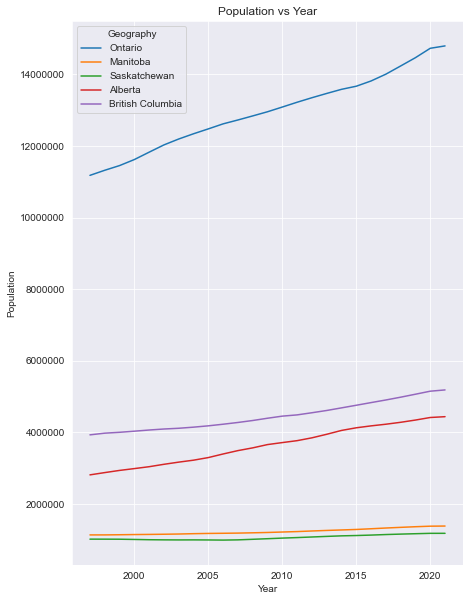

In [64]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(7, 10)
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data = popYear, x = 'Year', y = 'Population', hue = "Geography").set(title = 'Population vs Year')
fig.savefig(pwd + '/PopVYear.png')

## Corrections vs Province

Next is total Corrections over the same time period. Ontario is clearly much higher. Since Ontario is also a higher population it is clear that the ratio of corrections to population will be worth looking into.

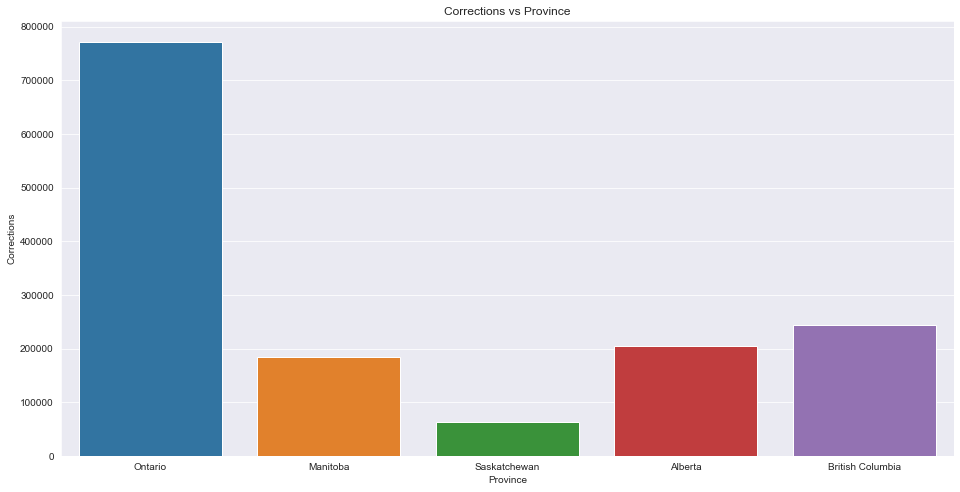

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'GEO', y = 'Corrections', data = YD, estimator = np.sum, ci = None).set(title = 'Corrections vs Province')
ax.set(xlabel='Province')
fig.savefig(pwd + '/CorrectionsVProvince.png')

## Corrections VS Year

Looking at a timeline of corrections by province, there is a large drop in all provinces, especially Ontario, with the introduction of the Youth Criminal Justice Act. Most provinces see a steady decline in corrections over time.

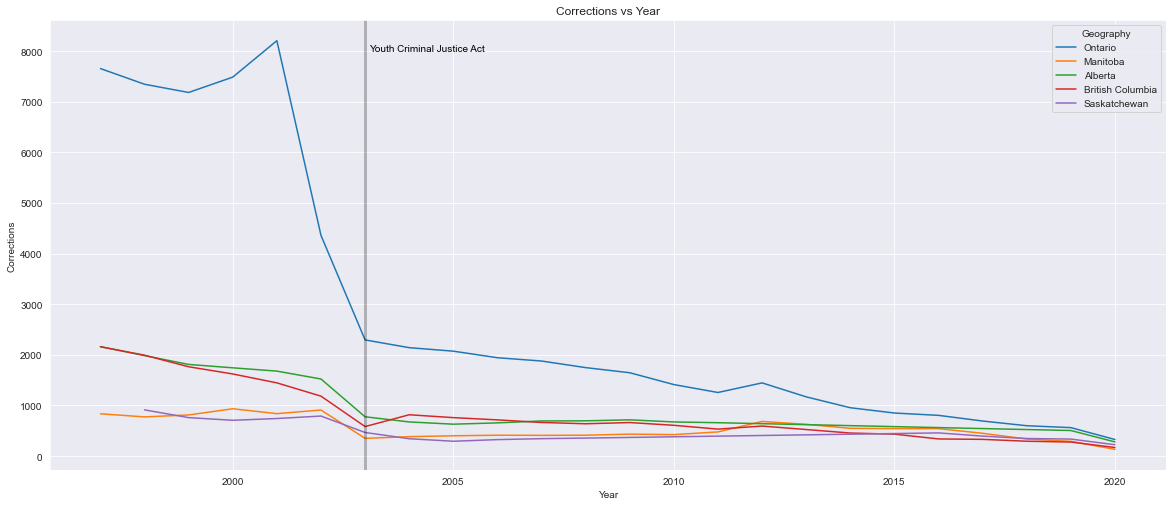

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
g = sns.lineplot(data = popMerge, x = 'REF_DATE', y = 'Corrections', hue = 'Geography', ci = None)
g.set(title = 'Corrections vs Year', xlabel='Year')
g.axvline(2003, color = 'black', lw = 3, alpha = 0.25)
plt.text(2003 + 0.1, 8000, "Youth Criminal Justice Act", horizontalalignment='left', size='medium', color='black')
fig.savefig(pwd + '/CorrectionsVYear.png')

## Youth Corrections per 1000 Population VS Year

Looking at youth corrections per capita (1000 population) vs Year, it appears that the trend is also a generally declining youth crime rate. The major exceptions are Manitoba and Saskatchewan who saw steadily increasing levels after the drop-off of the Youth Criminal Justice act. This upward trend continues until 2016. It is worth noting that Saskatchewan does not have data between 2006 and 2016, so it is possible that Saskatchewan also had elevated crime rates during this interval.

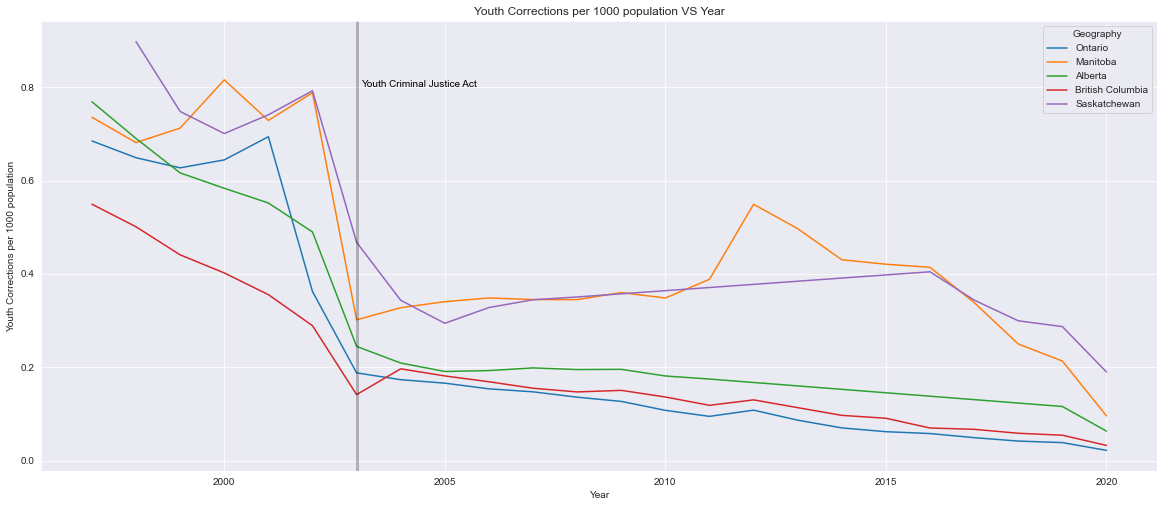

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
g = sns.lineplot(data = popMerge, x = 'REF_DATE', y = 'Youth_corrections_per_1000_population', hue = "Geography", ci = None)
g.axvline(2003, color = 'black', lw = 3, alpha = 0.25)
plt.text(2003 + 0.1, 0.8, "Youth Criminal Justice Act", horizontalalignment='left', size='medium', color='black')
g.set(xlabel = 'Year', ylabel = 'Youth Corrections per 1000 population', title = 'Youth Corrections per 1000 population VS Year')
fig.savefig(pwd + '/CorrectionsPerCapitaVYear.png')

## Youth Corrections per 1000 Population VS Year With Notations

Adding in major political changes and legislation can also help to understand what's going on during this timeline. Once again the Youth Criminal Justice act correlates to a reduction in corrections. Looking at the declines over the graph it is also fairly clear that the largest drops in corrections per capita happened during the Chretien and Trudeau administrations.

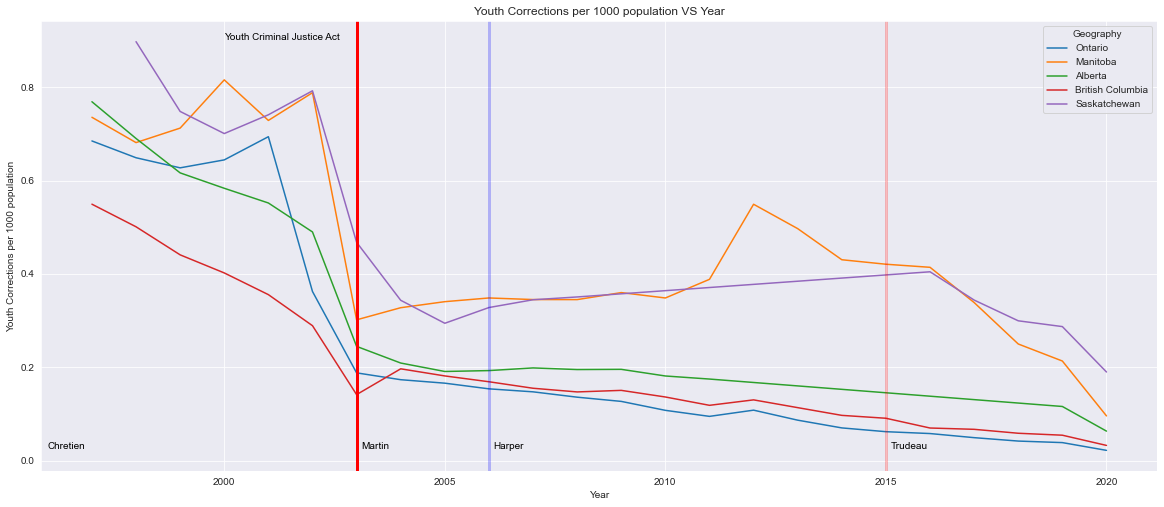

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
g = sns.lineplot(data = popMerge, x = 'REF_DATE', y = 'Youth_corrections_per_1000_population', hue = "Geography", ci = None)
g.set(xlabel = 'Year', ylabel = 'Youth Corrections per 1000 population', title = 'Youth Corrections per 1000 population VS Year')
g.axvline(2003, color = 'red', lw = 3, alpha = 1)
g.axvline(2006, color = 'blue', lw = 3, alpha = 0.25)
g.axvline(2015, color = 'red', lw = 3, alpha = 0.25)
plt.text(1996, 0.025, "Chretien", horizontalalignment='left', size='medium', color='black')
plt.text(2003 + 0.1, 0.025, "Martin", horizontalalignment='left', size='medium', color='black')
plt.text(2006 + 0.1, 0.025, "Harper", horizontalalignment='left', size='medium', color='black')
plt.text(2015 + 0.1, 0.025, "Trudeau", horizontalalignment='left', size='medium', color='black')
plt.text(2003 - 3, 0.9, "Youth Criminal Justice Act", horizontalalignment='left', size='medium', color='black')
fig.savefig(pwd + '/CorrectionsPerCapitaVYearN.png')

## Corrections per capita VS Year spread across Correction type VS Province

The last category to look at in this particular dataset is the type of Correctional services being administered. For this we will use a large facet grid to compare all 5 provinces to each other. Looking at this graph it is clear that Manitoba tends to have a higher ratio of 'pre-trial detentions' and 'other community sentances' than other provinces.

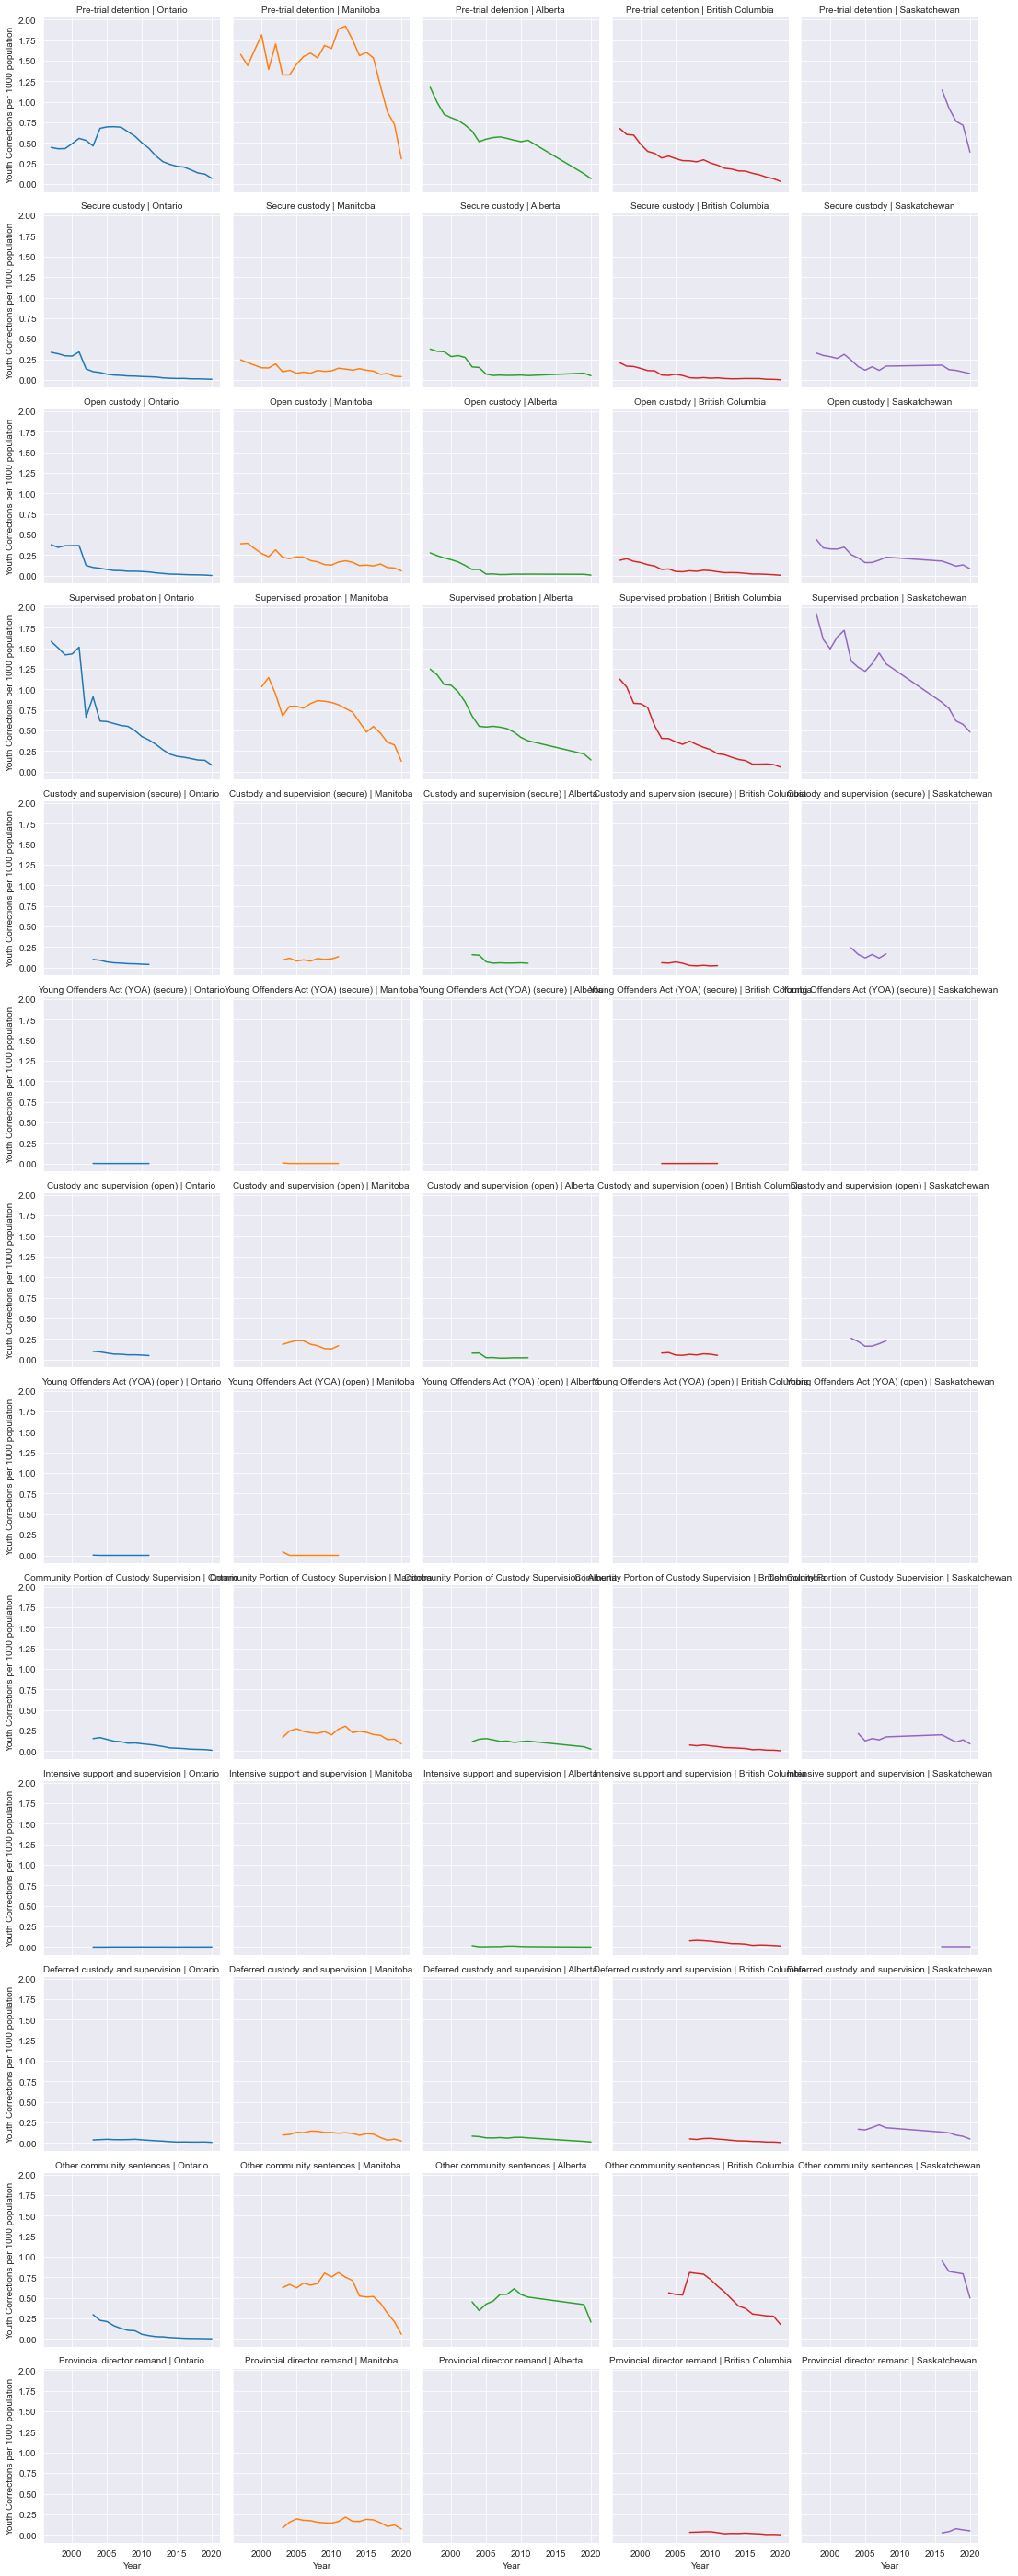

In [69]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(popMerge, col = 'Geography', row = 'Correctional_services', hue = 'Geography')
grid.map(sns.lineplot, 'REF_DATE', 'Youth_corrections_per_1000_population')
grid.set(xlabel = 'Year', ylabel = 'Youth Corrections per 1000 population', title = 'test')
grid.set_titles(col_template='{col_name}', row_template='{row_name}')
fig.savefig(pwd + '/CorrectionsPerCapitaYearProvince.png')

## Charges VS Offences for Canadian youth from 1991/1992 - 2019/2020

Next is looking at total youth charges laid by offence throughout Canada for the dataset (from 1991/1992 to 2019/2020)

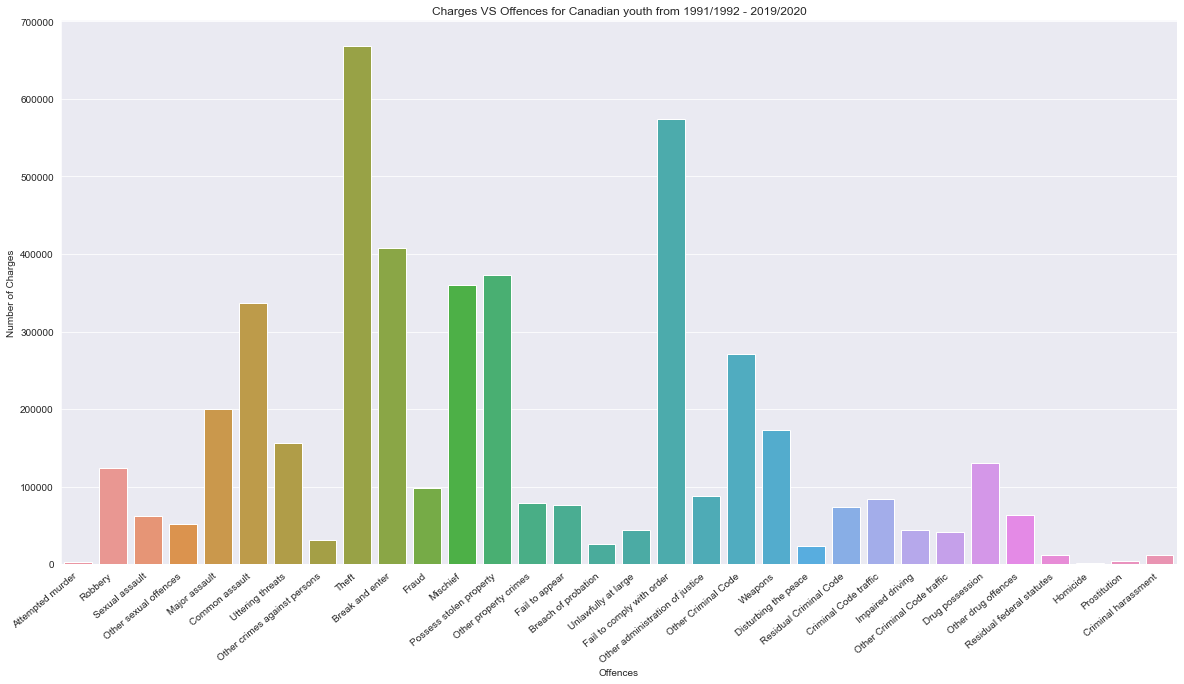

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'Offences', y = 'VALUE', data = data, estimator = np.sum, ci = None).set(title = 'Charges VS Offences for Canadian youth from 1991/1992 - 2019/2020', ylabel = 'Number of Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.savefig(pwd + '/ChargesVOffencesC.png')

Theft and Failure to comply have the highest counts. 

## Charges VS Offences for Manitoban youth from 1991/1992 - 2019/2020

Next is to see how Manitoba compares to the national averages.

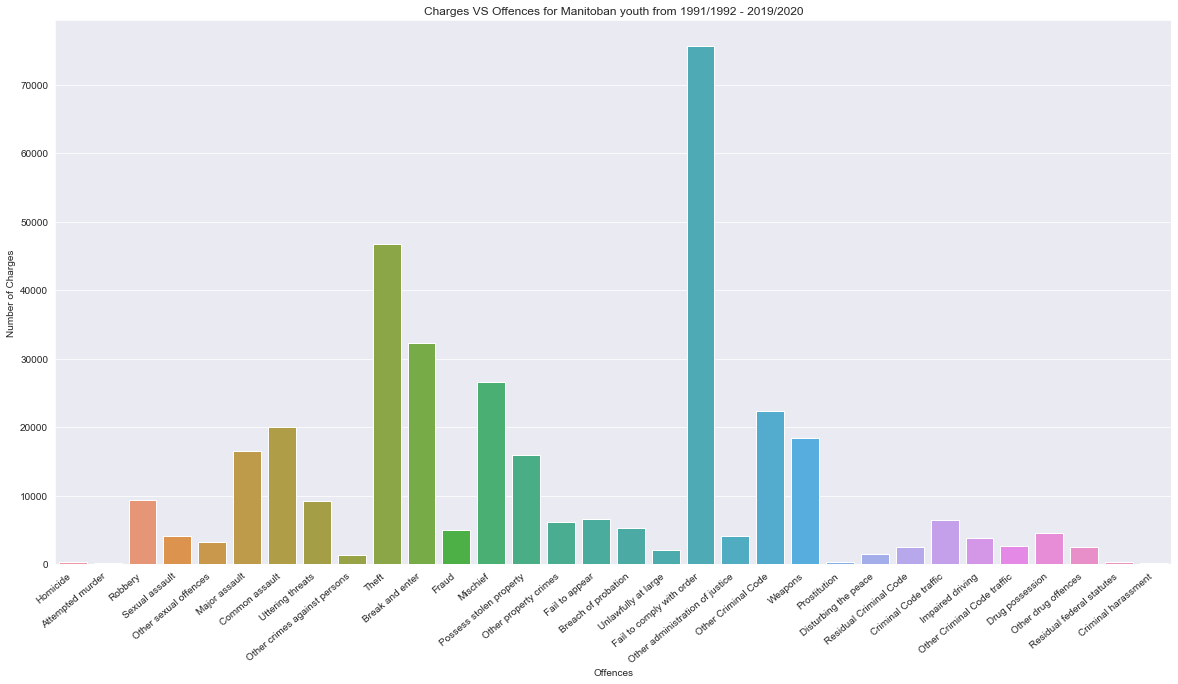

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'Offences', y = 'VALUE', data = mbData, estimator = np.sum, ci = None).set(title = 'Charges VS Offences for Manitoban youth from 1991/1992 - 2019/2020', ylabel = 'Number of Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.savefig(pwd + '/ChargesVOffencesM.png')

Looking at Manitoba it seems there is a lower level of Theft charges than the national average, but higher levels of Major assault, Sexual assault, Other sexual offences, and Failure to comply with order.

note: For this year, all 'Sex of accused' values were not collected. So it is not valuable to map it to Sexual assault, or other sexual offences charges.

## Charges VS Offences for Manitoba youth for 2019/2020

Next is to compare how the most recent 2019/2020 year compares to Manitoba's average since 1991/1992.

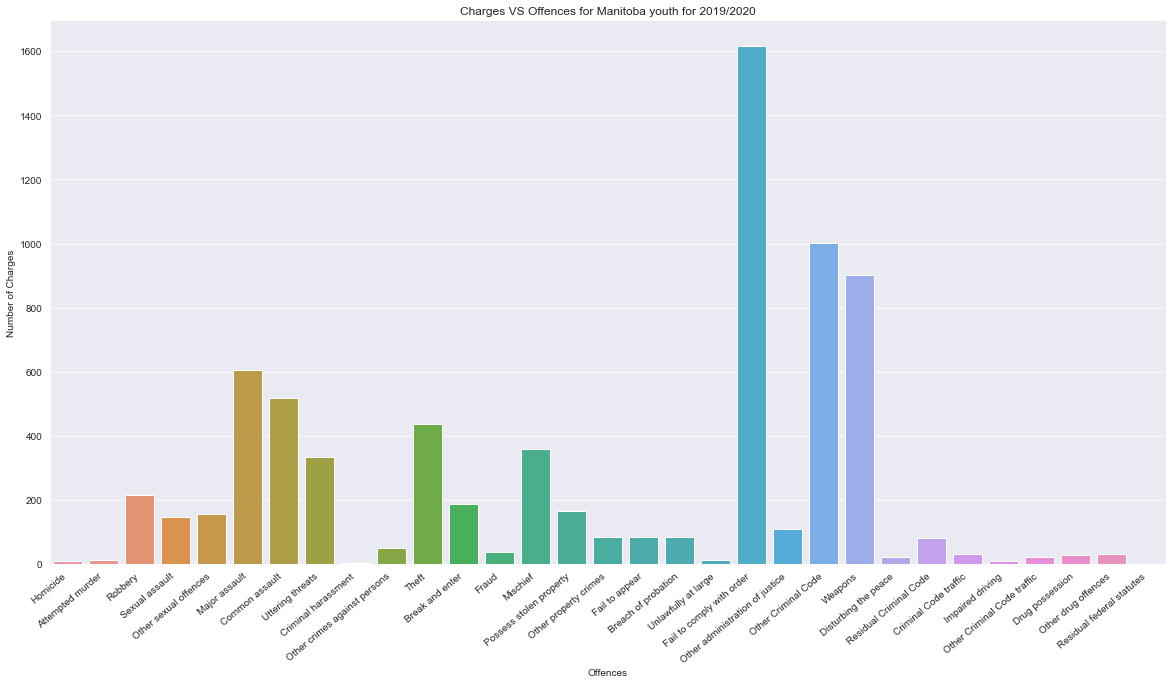

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'Offences', y = 'VALUE', data = mb2019, estimator = np.sum, ci = None).set(title = 'Charges VS Offences for Manitoba youth for 2019/2020', ylabel = 'Number of Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.savefig(pwd + '/ChargesVOffencesM2019.png')

In this particular year there is a startlingly high number of Major assault charges and Failure to comply charges. Splitting these up by type of decision might help to understand why.

## Charges VS Offences for Manitoba youth for 2019/2020

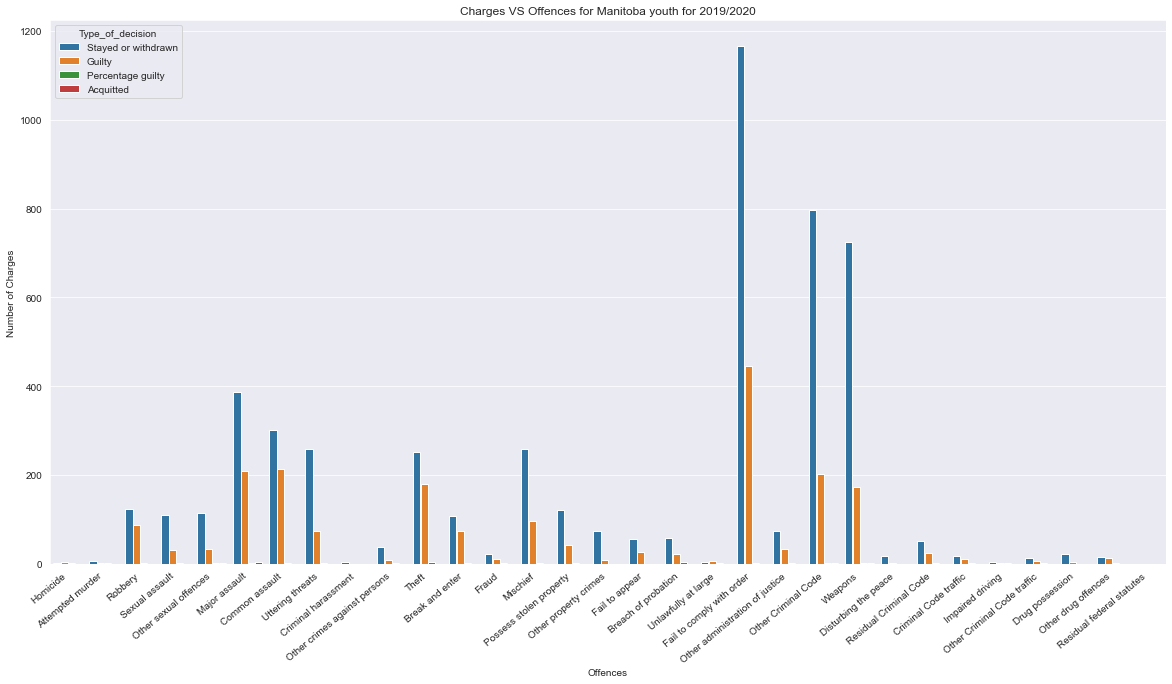

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'Offences', y = 'VALUE', data = mb2019, estimator = np.sum, hue = 'Type_of_decision', ci = None).set(title = 'Charges VS Offences for Manitoba youth for 2019/2020', ylabel = 'Number of Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.savefig(pwd + '/ChargesVOffencesM2019Hue.png')

Worth noting are how many Fail to comply charges, Weapons charges, and Other criminal code charges resulted in Stays or withdrawals. It might be worth having the province funding programs that target the reduction of Failure to comply and weapons charges amongst youth.

Finally worth noting is how an extremely small number of charges have resulted in acquittals. It would be worth looking into why this is the case since a stay remains on your record.

# Sources

#### Canada Population info - Statistics Canada

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901

#### Youth admissions to correctional services - Government of Canada Open Data Portal

https://open.canada.ca/data/en/dataset/c70a73e6-e42d-4e2a-91e3-6c0d41568952

https://open.canada.ca/data/en/dataset/1df8b66e-b773-425e-9551-62eba71bab28